In [1]:
from fromscratchtoml.models import svm
import matplotlib.pyplot as plt
import torch as ch
import numpy as np

## Linearly seperable data

In [2]:
X1 = ch.Tensor([[8, 7], [4, 10], [9, 7], [7, 10],
               [9, 6], [4, 8], [10, 10]])

X2 = ch.Tensor([[2, 7], [8, 3], [7, 5], [4, 4],
               [4, 6], [1, 3], [2, 5]])

Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [3]:
s = svm.SVC(kernel='linear', const=0, degree=1)
s.fit(X, y)

In [4]:
s.predict(X)

INFO:fromscratchtoml.models.svm.svc:
 1
 1
 1
 1
 1
 1
 1
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 14]




 1
 1
 1
 1
 1
 1
 1
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 14]

## Visualizations

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [6]:
def plot_data(ax, X1, X2):
    for i in range(len(X1)):
        ax.scatter(X1[i][0], X1[i][1], marker='x', color='g')
    for i in range(len(X2)):
        ax.scatter(X2[i][0], X2[i][1], marker='o', color='m')

In [7]:
plot_data(ax, X1, X2)

In [8]:
import numpy as np

In [9]:
s.predict(X1)

INFO:fromscratchtoml.models.svm.svc:
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 7]




 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 7]

In [10]:
s.predict(X2)

INFO:fromscratchtoml.models.svm.svc:
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 7]




-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 7]

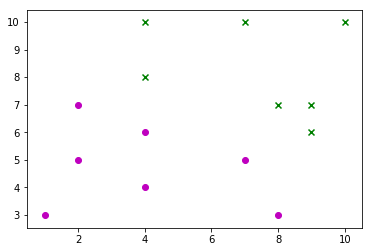

In [11]:
plt.show()

In [12]:
plt.close('all')

In [13]:
def plot_contour(X1_train, X2_train, clf):
    X1_train = X1_train.numpy()
    X2_train = X2_train.numpy()
    plt.plot(X1_train[:,0], X1_train[:,1], "ro")
    plt.plot(X2_train[:,0], X2_train[:,1], "bo")
    plt.scatter(clf.support_vectors.numpy()[:,0], clf.support_vectors.numpy()[:,1], s=100, c="g")

    X1, X2 = np.meshgrid(np.linspace(0,12,50), np.linspace(0,12,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
#     print(ch.Tensor(X))
    _, Z = clf.predict(ch.Tensor(X), return_projection=True)
    Z = Z.view(X1.shape)
    plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

    plt.axis("tight")
    plt.show()

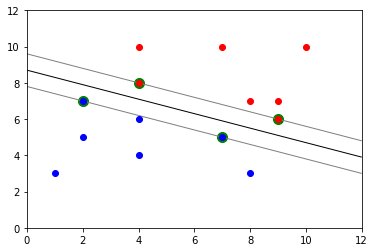

In [14]:
plot_contour(X1, X2, s)

## Non linearly seperable data

In [15]:
X1 = ch.Tensor([[10,10],[6,6],[6,11],[3,15],[12,6],[9,5],[16,3],[11,5]])
X2 = ch.Tensor([[3,6],[6,3],[2,9],[9,2],[18,1],[1,18],[1,13],[13,1]])
Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plot_data(ax, X1, X2)

In [17]:
s = svm.SVC(kernel='polynomial', const=0, degree=2)
s.fit(X, y)

In [18]:
s.predict(X1)

INFO:fromscratchtoml.models.svm.svc:
 1
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 8]




 1
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 8]

In [19]:
s.predict(X2)

INFO:fromscratchtoml.models.svm.svc:
-1
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 8]




-1
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 8]

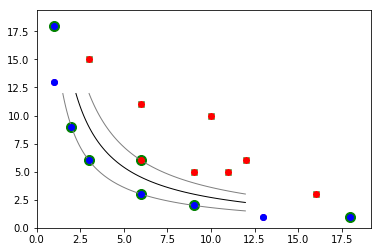

In [20]:
plot_contour(X1, X2, s)

## RBF

In [21]:
X1 = ch.Tensor([[10,10],[8,6],[8,10],[8,8],[12,6],[9,5],[11,8],[11,5]])
X2 = ch.Tensor([[10,13],[6,5],[6,9],[9,2],[14,8],[12,11],[10,13],[13,4]])
Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))